## Decision trees example

Continuous output example: A prediction model that states the motor mass value from references of motor torque. Different decision trees are created according to the required selection criteria.

**Step 1**: Import the required libraries.

In [1]:
# import numpy package for arrays and stuff 
import numpy as np 

# import matplotlib.pyplot for plotting our result 
import matplotlib.pyplot as plt 

# import pandas for importing csv files 
import pandas as pd 


Import the file containing the decision trees algorithms

In [2]:
import sys
sys.path.insert(0, 'decision trees')

from predicted_values_DT import *

**Step 2** : Multiinput decision tree

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

path='./Motors/'
df = pd.read_csv(path+'Non-Dominated-Motors.csv', sep=';')
df_X = df[['Tnom_Nm']] # we select the first five rows
df_y = df['r_omn']

Tree structure

In [17]:
from IPython.display import Image  
from io import StringIO
import pydot  
from sklearn import tree


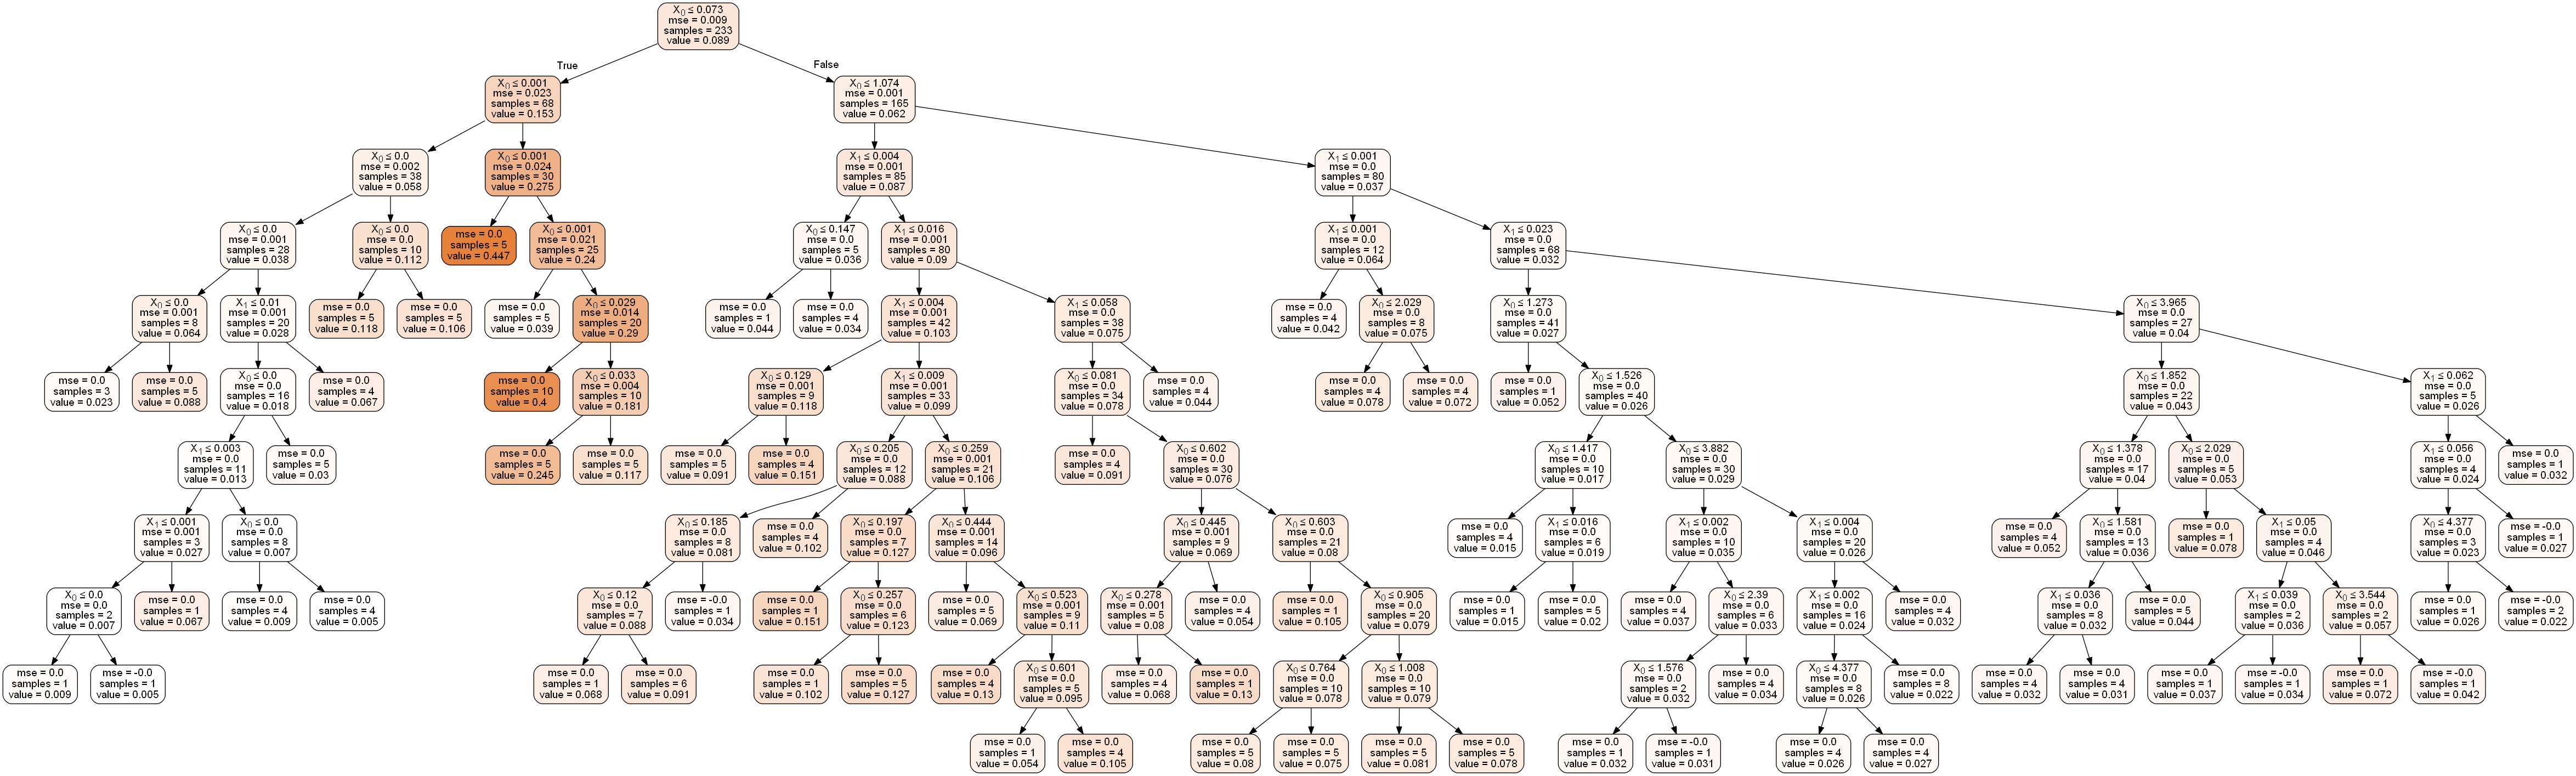

In [4]:

dot_data = StringIO()  
tree.export_graphviz(DT_handling(df[['Tnom_Nm','Kt_Nm_A']],df[['r_omn']],['next','average']), out_file=dot_data, 
    filled=True, rounded=True,
    special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

3D plot - average values

In [5]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np


%matplotlib widget 


In [7]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np


# read dataframe values

X = (df[['Tnom_Nm','Kt_Nm_A']].values)
y1 = (df['r_omn'].values)

# extracting columns from X
Cbat_col=X[:,0] 
Vbat_col=X[:,1]

#meshgrid 3D for plot

xx1,xx2= np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 100), 
                       np.linspace(X[:,1].min(), X[:,1].max(), 100))
positions = np.vstack([xx1.ravel(), xx2.ravel()]).T



#create the 3D axis 
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, azim=-210, elev=15)


xp = np.reshape(positions[:,0], (100, 100))
yp = np.reshape(positions[:,1], (100, 100))
zp = np.reshape(np.exp(DT_handling(np.log(X),np.log(y1),['next','next']).predict(np.log(positions))), (100, 100))


# ax.scatter(positions[:,0], positions[:,1], average_DT(df[['Tnom_Nm','Kt_Nm_A']],df[['r_omn']],positions), color='red', alpha=1.0, facecolor='white')
ax.plot_surface(xp, yp, zp, cmap=plt.cm.RdBu_r, alpha=0.7, linewidth=1)
ax.scatter(Cbat_col, Vbat_col, y1, color='black', alpha=1.0, facecolor='white')
# ax.scatter3D(np.array([0.06334653239388074]), np.array([0.01393876705859798]), (DT_handling((X),(y1),['next','average'],(np.array([[0.06334653239388074, 0.01393876705859798]])),10000)[0]), s=200,color='green')



#axis labels
ax.set_xlabel('Tnom (Nm) [-]',fontsize=14)
ax.set_ylabel('Kt (Nm/A) [-]',fontsize=14)
ax.set_zlabel('Resistance [Ohm]',fontsize=14)

plt.grid()

plt.tick_params(axis = 'both', labelsize = 14)

FigureCanvasNbAgg()

**Step 3**: Decision tree with a single input

In [8]:
from sklearn.tree import DecisionTreeRegressor

path='./Motors/'
df = pd.read_csv(path+'Non-Dominated-Motors.csv', sep=';')
df_X = df[['Tnom_Nm']] # we select the first five rows
df_y = df['r_omn']

plt.figure()

# create a regressor object (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
regressorAver = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=1,
           max_leaf_nodes=len(df_X), min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           random_state=None, splitter='best')

# fit the regressor with X and Y data 
regressorAver.fit(df_X.values.reshape(-1,1) , df_y.values.reshape(-1,1)) 


# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.0001 between two 
# consecutive values 
X_grid = np.linspace(df_X.min(), df_X.max(), num=10000) 

# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make 
# a column out of the X_grid values 
X_grid = X_grid.reshape((len(X_grid), 1)) 

# scatter plot for original data 
# plt.scatter(df_X, df_y, color = 'red', label='references') 
plt.scatter(df_X, df_y) 
# plt.xlim(df_X.min(), df_X.max())

# plot predicted data 
plt.plot(X_grid, regressorAver.predict(X_grid), color = 'black', label='decision tree based on average val.') 

# specify title 
plt.title('Non dominated references voltage to power (Decision Tree Regression)') 

# specify labels 
plt.xlabel('Max power [W]')
plt.ylabel('Max voltage [V]')

# plot the legend
plt.legend()
# show the plot 
plt.grid()
plt.show()

FigureCanvasNbAgg()

**Step 2**: Initialize and print the Dataset

In [10]:
# import dataset 
# dataset = pd.read_csv('Data.csv') 
# alternatively open up .csv file to read data 

import pandas as pd
import matplotlib.pyplot as plt

plt.figure()

path='./Motors/'
df = pd.read_csv(path+'Non-Dominated-Motors.csv', sep=';')

#selection of the dataframe columns
df_X=df[['Tnom_Nm']]
df_y=df.Kt_Nm_A

xy = pd.concat([df_X,df_y],axis=1)
sorted_xy = np.unique(xy,axis=0)

plt.scatter(df_X, df_y, color = 'red') 
plt.xlabel('Torque [Nm]')
plt.ylabel('Kt [Nm/A]')
plt.grid()
plt.show()

FigureCanvasNbAgg()

**Step 3**: Fit decision tree regressor to the dataset

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. More information can be found under the following [reference](https://scikit-learn.org/stable/modules/tree.html).

Depending on the selection criteria, we define the following regression trees:
- Decision trees centered on the reference.
- Decision trees based on the selection of the previous value.
- Decision trees based on the selection of the next value.


**Step 3.1**: Decision tree centered on the reference:

The `sklearn.tree` module includes decision tree-based models for regression.

#### 1D

In [11]:
from sklearn.tree import DecisionTreeRegressor

plt.figure()

# create a regressor object (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
regressorAver = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=1,
           max_leaf_nodes=len(df_X), min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           random_state=None, splitter='best')

# fit the regressor with X and Y data 
regressorAver.fit(df_X , df_y) 

# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.0001 between two 
# consecutive values 
X_grid = np.linspace(min(df_X.values), max(df_X.values), num=10000) 

# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make 
# a column out of the X_grid values 
X_grid = X_grid.reshape((len(X_grid), 1)) 

# scatter plot for original data 
plt.scatter(df_X, df_y, color = 'red', label='references') 
# plt.scatter(df_X, df_y, color = 'red') 
# plt.xlim(df_X.min(), df_X.max())

# plot predicted data 
plt.plot(X_grid, regressorAver.predict(X_grid), color = 'black', label='decision tree based on average val.') 

# specify title 
plt.title('Non dominated references Kt to torque (Decision Tree Regression)') 

# specify labels 
plt.xlabel('Torque [Nm]')
plt.ylabel('Kt [Nm/A]')

# plot the legend
plt.legend()
# show the plot 
plt.grid()
plt.show()

FigureCanvasNbAgg()

In [12]:
regressorAver.predict(np.array([[1]]))

array([0.02652582])

**Step 3.2**: Decision trees based on the selection of the previous value:

The standard scikit learn decision tree regressor function generates a regression function, which selects the necessary splits to minimize the possible selection error (mse). This is normally achieved by using the average of each terminal node as splits (more information [here](https://towardsdatascience.com/https-medium-com-lorrli-classification-and-regression-analysis-with-decision-trees-c43cdbc58054)). However, if we want to force the split towards a certain point we must generate additional points, which do not affect our dataset too much.

*Example: Considering we have the points of X=[1,2,3] and Y=[5,6,7], and we want to construct a regression tree based on the previous values of Y, we have to add some additional points to force the regression pass by these points as we see in the example below.*

In [13]:
df_X_ex = np.array([1,1,1.9,1.9,2.1,2.1,2.9,2.9,3.1,3.1])
df_y_ex = np.array([4.9,5.1,4.9,5.1,5.9,6.1,5.9,6.1,6.9,7.1])
X_ex = np.array([1,2,3])
Y_ex = np.array([5,6,7])
plt.figure()

# create a regressor object (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
regressor = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=1,
           max_leaf_nodes=len(df_X_ex), min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           random_state=None, splitter='best')

# fit the regressor with X and Y data
regressor.fit(df_X_ex.reshape(-1,1) , df_y_ex.reshape(-1,1)) 


# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two 
# consecutive values 
X_grid = np.linspace(min(df_X_ex), max(df_X_ex), num=10000) 

# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make 
# a column out of the X_grid values 
X_grid = X_grid.reshape((len(X_grid), 1)) 

# scatter plot for original data 
plt.scatter(X_ex,Y_ex, marker='x',label='references',color='black')

plt.scatter(df_X_ex, df_y_ex, color = 'red',label='supplementary points') 

# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue', label='decision tree') 
plt.legend()
plt.grid()
plt.show()

FigureCanvasNbAgg()

Axis x

In [14]:
frames=[]# a list to append all columns
for i in range(len(df_X.columns)):
    # a vector of supplementary points around the reference value to force the regression tree through X
    C=(np.vstack((sorted_xy[:,i]-sorted_xy[:,i].min()/1000,sorted_xy[:,i]+sorted_xy[:,i].min()/1000)).ravel('F'))
    D=np.repeat(C, 2)
    A=(np.delete(np.delete(D,2),2))
    frames.append(A)
df_XPrev=np.column_stack(frames)

Axis y

In [15]:
df_y1 = sorted_xy[:,-1]
df_y1_C1 = df_y1-df_y1.min()/100
df_y1_C2 = df_y1+df_y1.min()/100
A=np.repeat(df_y1_C1, 2)
B=np.repeat(df_y1_C2, 2)
C=(np.vstack((A,B)).ravel('F'))
df_yPrev=(C[:-2])

In [16]:
from sklearn.tree import DecisionTreeRegressor
plt.figure()

# create a regressor object (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
regressorPrev = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=1,
           max_leaf_nodes=len(df_XPrev), min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           random_state=None, splitter='best')

# fit the regressor with X and Y data 
regressorPrev.fit(df_XPrev, df_yPrev) 


# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two 
# consecutive values 
X_grid = np.linspace(min(df_XPrev), max(df_XPrev), num=10000) 

# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make 
# a column out of the X_grid values 
X_grid = X_grid.reshape((len(X_grid), 1)) 

# scatter plot for original data 
plt.scatter(df_XPrev, df_yPrev, color = 'red',label='supplementary points') 
plt.scatter(df_X,df_y, color = 'k', label='references', marker='x')  

# plot predicted data 
plt.plot(X_grid, regressorPrev.predict(X_grid), color = 'blue',label='regression tree')

# specify title 
plt.title('Non dominated references Kt to torque (Decision Tree Regression)') 

# specify y axis label 
plt.xlabel('Torque [Nm]')
plt.ylabel('Kt [Nm/A]')

# show the plot 
plt.grid()
plt.legend()
plt.show()

FigureCanvasNbAgg()

**Step 3.2.1.**: Prediction of further values:

In [21]:
# predicting a new value 

# test the output by changing values, like 3750 
y_pred = regressorPrev.predict(np.array([[3.5]]))

# print the predicted price 
print("Predicted motor constant: % .3f Nm/A\n"% y_pred) 


Predicted motor constant:  0.052 Nm/A



**Step 3.3.**: Decision tree based on the selection of the next values

*Example: Considering we have the dataset of X=[1,2,3] and Y=[5,6,7], we want to trace a regression tree based on the next values of Y, we have to add some additional points to force the regression pass by these points as we see in the example below.*

<IPython.core.display.Javascript object>


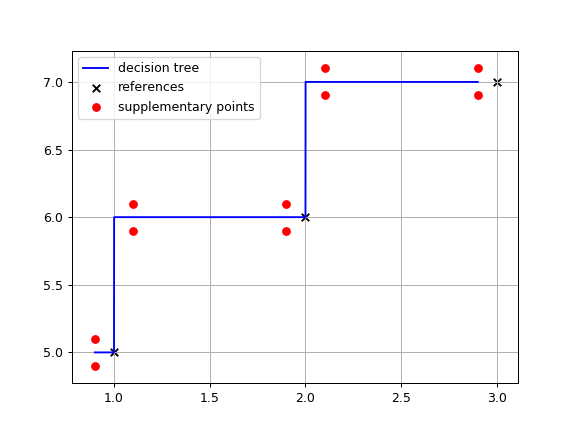

In [22]:
df_X_ex = np.array([0.9,0.9,1.1,1.1,1.9,1.9,2.1,2.1,2.9,2.9])
df_y_ex = np.array([4.9,5.1,5.9,6.1,5.9,6.1,6.9,7.1,6.9,7.1])
X_ex = np.array([1,2,3])
Y_ex = np.array([5,6,7])
plt.figure()

# create a regressor object (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
regressor = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=1,
           max_leaf_nodes=len(df_X), min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           random_state=None, splitter='best')

# fit the regressor with X and Y data
regressor.fit(df_X_ex.reshape(-1,1) , df_y_ex.reshape(-1,1)) 


# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two 
# consecutive values 
X_grid = np.arange(min(df_X_ex), max(df_X_ex), 0.00001) 

# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make 
# a column out of the X_grid values 
X_grid = X_grid.reshape((len(X_grid), 1)) 

# scatter plot for original data 
plt.scatter(X_ex,Y_ex, marker='x',label='references',color='black')

plt.scatter(df_X_ex, df_y_ex, color = 'red',label='supplementary points') 

# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue', label='decision tree') 
plt.legend()
plt.grid()
plt.show()

Axis x

In [23]:
frames=[]
for i in range(len(df_X.columns)):
    # a vector of supplementary points around the reference value to force the regression tree through X
    C=(np.vstack((sorted_xy[:,i]-sorted_xy[:,i].min()/1000,sorted_xy[:,i]+sorted_xy[:,i].min()/1000)).ravel('F'))
    D=np.repeat(C, 2)
    frames.append(D[:-2])
df_X_Next=np.column_stack(frames)

Axis y

In [24]:
df_y1 = sorted_xy[:,-1]
df_y1_C1 = df_y1-df_y1.min()/100
df_y1_C2 = df_y1+df_y1.min()/100
A=np.repeat(df_y1_C1, 2)
B=np.repeat(df_y1_C2, 2)
C=(np.vstack((A,B)).ravel('F'))
C=(np.delete(np.delete(C,2),2))
df_y_Next=(C)

<IPython.core.display.Javascript object>


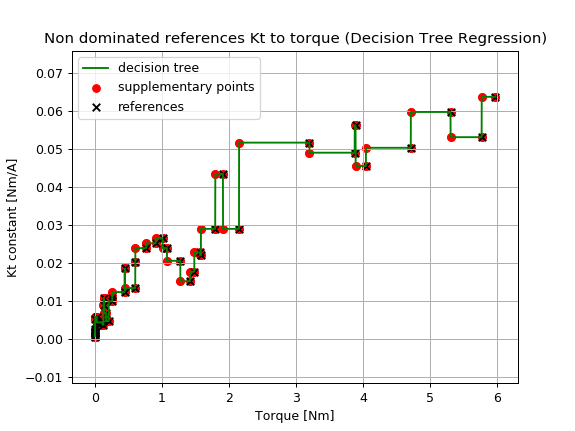

In [25]:
from sklearn.tree import DecisionTreeRegressor

plt.figure()

# create a regressor object (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
regressorNext = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=1,
           max_leaf_nodes=len(df_X_Next), min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           random_state=None, splitter='best')

# fit the regressor with X and Y data 
regressorNext.fit(df_X_Next, df_y_Next) 


# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two 
# consecutive values 
X_grid = np.linspace(min(df_X_Next), max(df_X_Next), num=10000) 

# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make 
# a column out of the X_grid values 
X_grid = X_grid.reshape((len(X_grid), 1)) 

# scatter plot for original data 

plt.scatter(df_X_Next, df_y_Next, color = 'red',label='supplementary points') 
plt.scatter(df_X ,df_y, marker='x',label='references',color='black')

# specify title 
plt.title('Non dominated references Kt to torque (Decision Tree Regression)') 

# plot predicted data 
plt.plot(X_grid, regressorNext.predict(X_grid), color = 'green', label='decision tree') 

# specify y axis label 
plt.xlabel('Torque [Nm]')
plt.ylabel('Kt constant [Nm/A]')

# show the plot 
plt.grid()
plt.legend()
plt.show()


**Step 3.3.1.**: Prediction of further values:

In [26]:
# predicting a new value 

# test the output by changing values, like 3750 
y_pred = regressorNext.predict(np.array([[5.1]]))

# print the predicted price 
print("Predicted motor constant: % .5f Nm/A \n"% y_pred) 


Predicted motor constant:  0.05968 Nm/A 



**Step 4:** Display of all regression trees with references

<IPython.core.display.Javascript object>


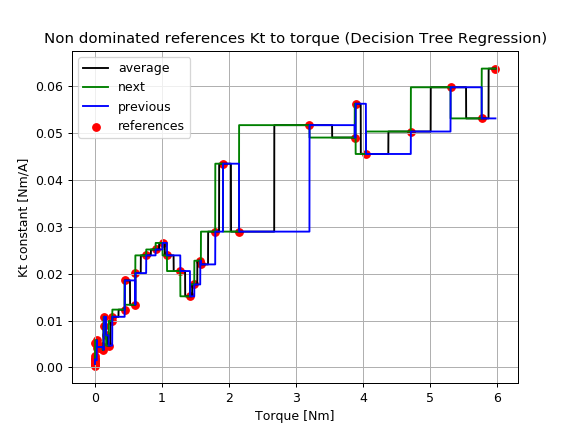

In [27]:
plt.figure()
plt.plot(X_grid, regressorAver.predict(X_grid), label = 'average', color='black') 
plt.plot(X_grid, regressorNext.predict(X_grid), label = 'next', color='green')
plt.plot(X_grid, regressorPrev.predict(X_grid), label = 'previous', color='blue')
plt.scatter(df_X ,df_y, label='references',color = 'red') 

plt.legend()

# specify title 
plt.title('Non dominated references Kt to torque (Decision Tree Regression)') 

# specify X axis label 
plt.xlabel('Torque [Nm]')
plt.ylabel('Kt constant [Nm/A]')

# show the plot 
plt.grid()
plt.show()

**Step 6**: Build your decision tree. Example: decision tree based on previous values:

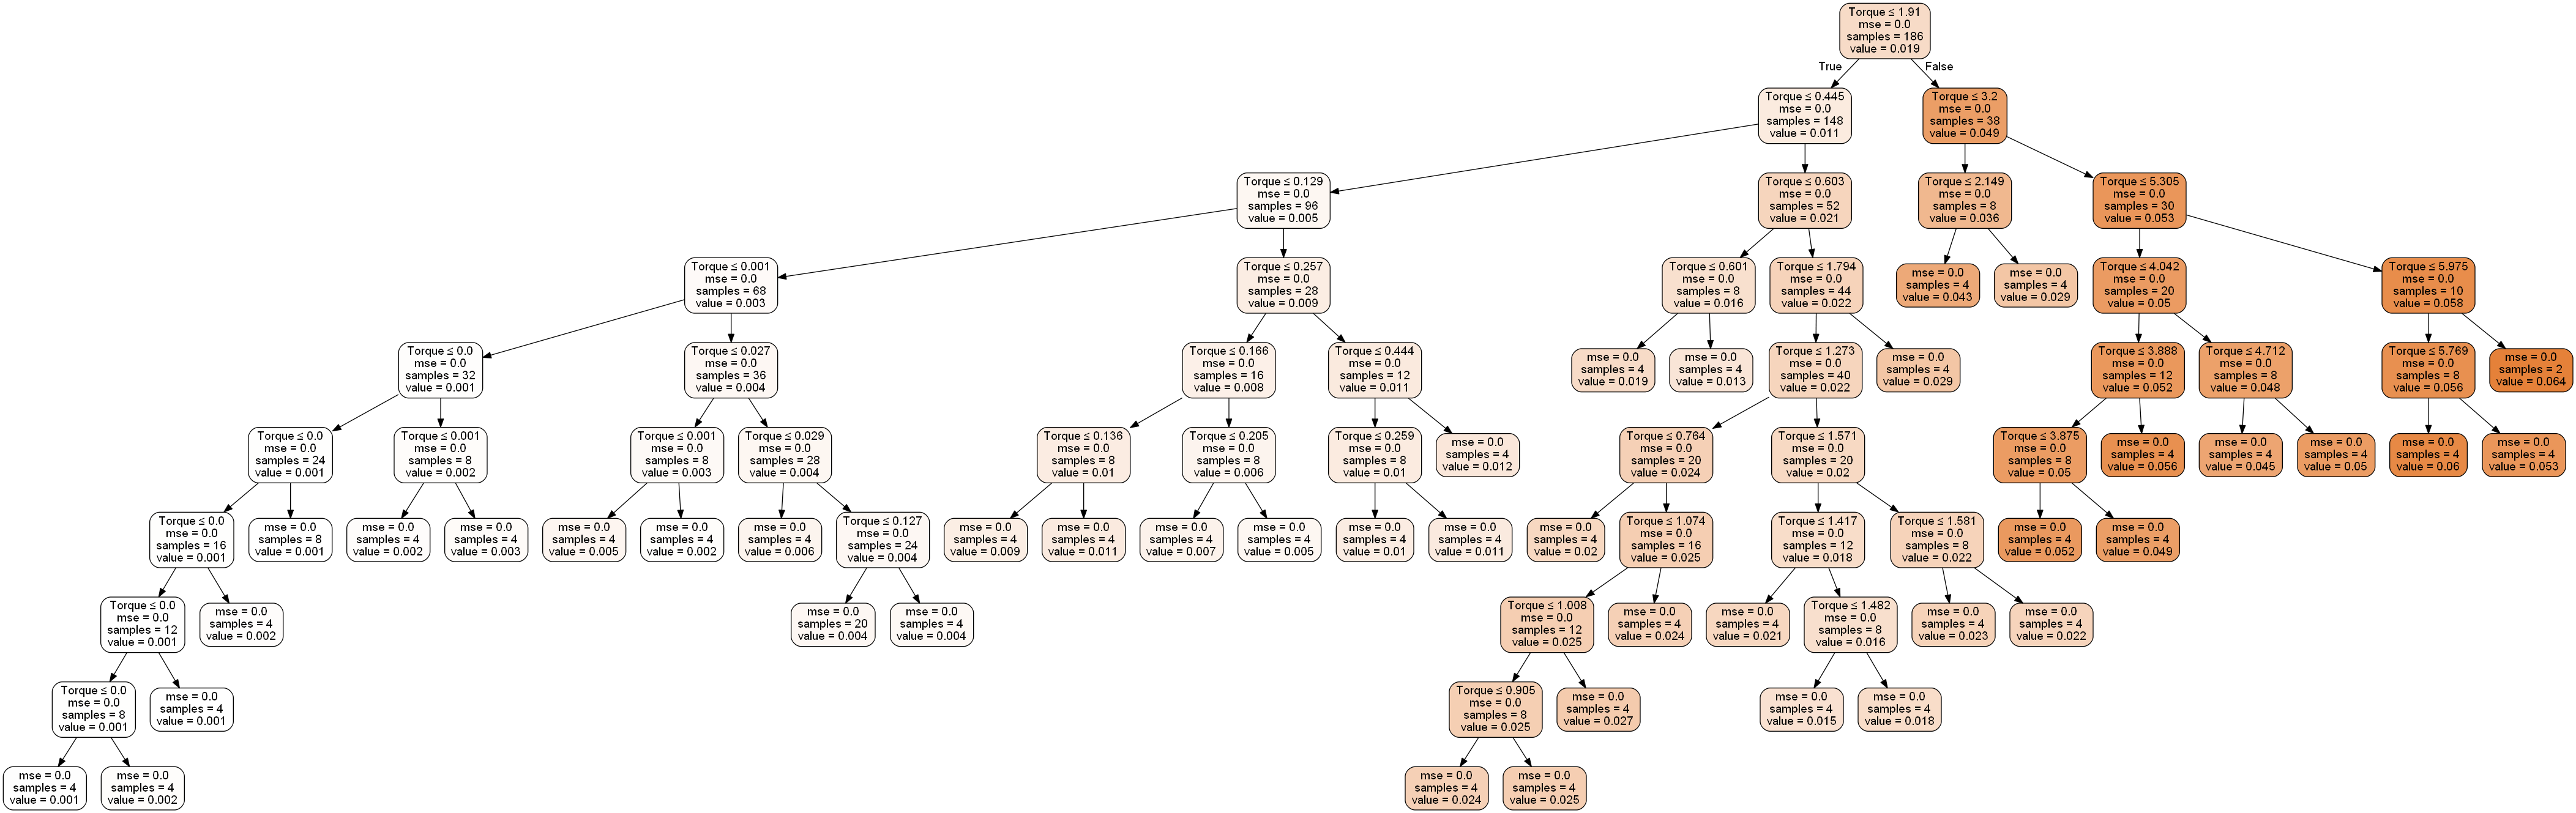

In [16]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot  
from sklearn import tree

dot_data = StringIO()  
tree.export_graphviz(regressorPrev, out_file=dot_data,  
    feature_names=['Torque'],
    filled=True, rounded=True,
    special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Conclusions

#### Avantages
- Les arbres de decision nous permettent de travailler de manière échélonnée
- Ils nous permettent de prévoir de nouvelles valeurs, (ce qui sera utile lors de l'utilisation d'un code de dimensionnement).
- Code simplifié, moins encombrant que de travailler avec la structure

#### Inconvénients
- Les critères de fractionnement se font sur la base de certains paramètres préétablis, tels que la maximisation de l'MSE (Mean Squared Error) ou de l'EMA (Mean Absolute Error) ``criterion{“mse”, “friedman_mse”, “mae”}, default=”mse”``. (minimum number of decision nodes is not available as argument). Au contraire, nous sommes plus intéressés à travailler avec une sorte d'escalier

#### Alternatives
- Trace en escalier--> Difficulté à prévoir de nouvelles valeurs?
- Construire notre propre arbre de décision, où chaque division est faite pour chaque point--> 